In [178]:
import time
import openvino as ov
from openvino.inference_engine import IECore
from openvino.runtime import Core
import matplotlib.pyplot as plt
import numpy as np

def main():
    # core = ov.core()
    ie=IECore()
    i=Core()
    model_path= "Z:\\veera\\Openvino\\retinal_layer_openvino.xml"
    net = ie.read_network(model=model_path, weights=model_path.replace('.xml', '.bin'))
    exec_net = ie.load_network(network=net, device_name="CPU")                         
    # binpath = core.read_model("Y:\\DeepLearning\\Cornealtopography\\placidos\\f32\\model32.bin")
    
    # device = widgets.Dropdown(
    #     options=core.available_devices + ["AUTO"],
    #     value='AUTO',
    #     description='Device:',
    #     disabled=False,
    # )
    
    # print(device)
    compiled_model = i.compile_model(model=net, device_name="CPU")
    # print(compiled_model)
    # input_size = ov_model.input(0)
    # output_size = ov_model.output(0)
    # print(input_size,output_size)
    image_filename = "D:\\veera\\Onnx_jeron\\Images\\input\\Raw-10001.tif"
    image = cv2.imread(image_filename,0)
   
    newimage = np.expand_dims(np.expand_dims(image, axis=0), axis=0).astype(np.float32)
    print(f"input data shape : {newimage.shape}")
    res_xml = compiled_model(newimage)
    
    # result_index = np.argmax(res_xml)
    # print(f"result index : {result_index}")
    
   
    # result_mask_ir = np.squeeze(np.argmax(res_xml, axis=1)).astype(np.uint8)
    # plt.imshow(res_xml, cmap='gray')
    plt.imshow(image)
    plt.show()
if __name__ == "__main__":
    start_time=time.time()
    main()
    end_time=time.time()
    print("total time",end_time-start_time)

RuntimeError: Path: '<openvino.inference_engine.ie_api.IENetwork object at 0x000002DF09A22810>' does not exist. Please provide valid model's path either as a string or pathlib.Path. Examples:
(1) '/home/user/models/model.onnx'
(2) Path('/home/user/models/model/model.onnx')

False


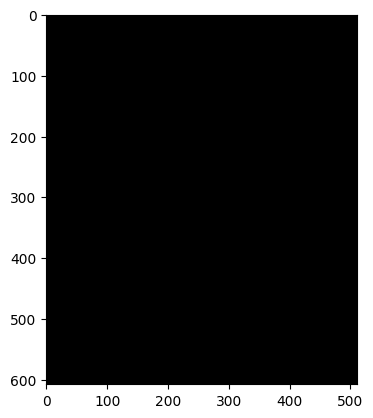

total time 3.8702809810638428


In [161]:
import openvino as ov
from openvino.inference_engine import IECore
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

def main():
    ie = IECore()
    # model_path = "Z:/Veera/openvino/retinal_layer_openvino.xml"
    model_path = "Z:\\veera\\Openvino\\retinal_layer_openvino.xml"
    
    net = ie.read_network(model=model_path, weights=model_path.replace('.xml', '.bin'))
    exec_net = ie.load_network(network=net, device_name="CPU")
    
    # Assuming input_size and output_size are defined elsewhere in your code
    # print(input_size, output_size)
    
    image_filename = "D:\\veera\\Onnx_jeron\\Images\\input\\Raw-10001.tif"
    image = cv2.imread(image_filename, 0)
    newimage = np.expand_dims(np.expand_dims(image, axis=0), axis=0).astype(np.float32)
    # print(f"input data shape : {newimage.shape}")
    # newimage=np.argmax(newimage,axis=1)
    # print(rr.shape)
    input_blob_name = "input"
    res_xml = exec_net.infer(inputs={input_blob_name: newimage})
    values_array = np.array(list(res_xml.values()))
    # values_array=values_array[0,0,0,...]
    # print("Values Array:", values_array)
    
    val=np.any(values_array>1)
    print(val)
    
    
    
    
   
    
    rr=np.argmax(values_array,axis=0)
    # print(rr.shape)
   

    nn=np.argmax(rr,axis=0)


    # nn=nn[0,...]
    # cv2.imwrite('xml.png',nn)

    # print(nn.shape)
  
    
   
    
  
    # Assuming you have defined input_blob_name elsewhere in your code
    
    # result_index = np.argmax(res_xml)
    # print(result_index.shape)
    # print(f"result index : {result_index}")
    
    # result_mask_ir = np.argmax(np.squeeze(values_array,axis=1),axis=1).astype(np.uint8)
    
    # print(result_mask_ir.shape)
    plt.imshow(nn[0,...], cmap='gray')
    # # # plt.imshow(res)
    plt.show()

if __name__ == "__main__":
    start_time = time.time()
    main()
    end_time = time.time()
    print("total time", end_time - start_time)


In [154]:
from openvino.inference_engine import IECore,IENetwork
from openvino.runtime import Core
from PIL import Image
import openvino as ov
import numpy as np
import cv2
import matplotlib.pyplot as plt

<Type: 'float32'>
(1, 1, 608, 512)


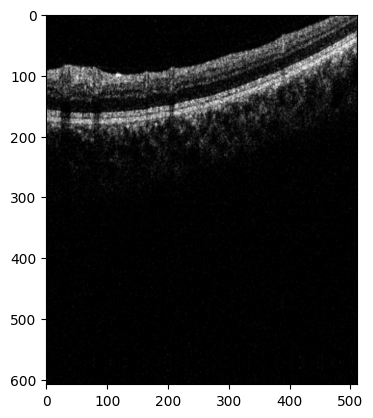

In [150]:
model_xml= "Z:\\veera\\Openvino\\retinal_layer_openvino.xml"
model_bin= "Z:\\veera\\Openvino\\retinal_layer_openvino.bin"

ie=Core()

model=ie.read_model(model=model_xml,weights=model_bin)
compiled_model = ie.compile_model(model=model, device_name="CPU")
input_name = next(iter(compiled_model.inputs))
output_name = next(iter(compiled_model.outputs))

print(input_name.element_type)

image=Image.open("D:\\veera\\Onnx_jeron\\Images\\input\\Raw-10001.tif")
img=image.resize((input_name.shape[3],input_name.shape[2]))
img=np.array(img)
img = img[np.newaxis, np.newaxis, :, :]
# img=img.astype(np.float32)
print(img.shape)      #(1,3,512,608)

plt.imshow(image,'gray')

In [58]:
result = compiled_model.infer_new_request({input_name.any_name: img})

In [52]:
# output_name = compiled_model.result[0]  # Assuming there's only one output layer
# output_data = result[output_name]

In [148]:
arr=np.array(list(result.values()))
# arr=np.round(arr.tolist())
# print(arr)

val=np.any(arr>1)
print(val)

False


In [124]:
arr=arr[0,...]
print(arr.shape)

(1, 8, 608, 512)


In [125]:
arr1=arr[0,...]
print(arr1.shape)
arr=arr.astype('float16')
print(arr.dtype)

(8, 608, 512)
float16


In [126]:
arr2=arr1[0,...]
print(arr2.shape)

(608, 512)


True

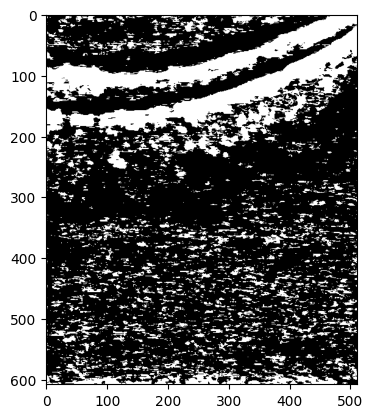

In [127]:
plt.imshow(arr2,'gray')
cv2.imwrite('D:\\veera\\Openvino\\Openvino.png',arr2)

In [5]:
from openvino.inference_engine import IECore

ie = IECore()
model_path =  "D:\\veera\\Openvino\\latest\\model.xml"  # Path to the model file
net = ie.read_network(model=model_path, weights=model_path.replace('.xml', '.bin')) 

ModuleNotFoundError: No module named 'openvino.inference_engine'

In [187]:
import cv2
import numpy as np

input_blob = next(iter(net.input_info))  # Get the name of the input layer
n, c, h, w = net.input_info[input_blob].tensor_desc.dims  # Get the input dimensions

# Assuming your input is an image
image=Image.open("D:\\veera\\Onnx_jeron\\Images\\input\\Raw-10001.tif")
img=image.resize((input_name.shape[3],input_name.shape[2]))
img=np.array(img)
img = img[np.newaxis, np.newaxis, :, :]
print(img.shape)

(1, 1, 608, 512)


In [189]:
exec_net = ie.load_network(network=net, device_name='CPU')  # Load the network to the inference engine

In [190]:
result = exec_net.infer(inputs={input_blob: img})

In [204]:
output_blob = next(iter(exec_net.outputs))
output_data = result[output_blob]
print(output_data.dtype)
print(type(output_data))
print(output_data.ndim)
print(output_data.shape)

val=np.any(output_data>1)
print(val)

float32
<class 'numpy.ndarray'>
4
(1, 8, 608, 512)
False


In [207]:
b=np.squeeze(output_data)
print(b.shape)

b=b[0,...]
print(b.shape)

(8, 608, 512)
(608, 512)


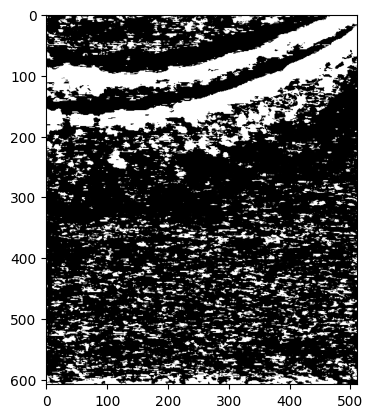

In [210]:
plt.imshow(b,'gray')

In [212]:
%pip install -q "openvino>=2023.1.0" onnx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''python -m venv openvino_env
python -m pip install --upgrade pip
pip install openvino==2024.0.0'''

In [3]:
import time
import warnings
from pathlib import Path
from PIL import Image
import cv2
import numpy as np
import openvino as ov

In [4]:
ir_path = 'D:\\veera\\placido\\Final\\Latest_openvino\\discmodel.xml'
onnx_path="D:\\veera\\placido\\Final\\max_dice_model_32.onnx"
ov_model=ov.convert_model(onnx_path)
ov.save_model(ov_model,ir_path)


In [5]:
core = ov.Core()
model_onnx = core.read_model(model=onnx_path)


In [6]:
compiled_model_onnx = core.compile_model(model=model_onnx, device_name='CPU')

In [5]:
# input_blob = next(iter(model_onnx.input_info)) 

In [40]:
image=Image.open("D:\\veera\\placido\\new_img\\NSB001.tif")

import torchvision.transforms as transforms
to_tensor=transforms.ToTensor()(image).unsqueeze_(0)
print(to_tensor.shape)

torch.Size([1, 1, 512, 704])


In [41]:
res_onnx = compiled_model_onnx([to_tensor])[0]

print(type(res_onnx))

<class 'numpy.ndarray'>


In [42]:
gg=np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)

In [43]:
im=Image.fromarray(gg)
im.save("seg.png")

In [44]:
import torch

In [60]:
import time
import warnings
from pathlib import Path
from PIL import Image
# import cv2
import numpy as np
import openvino as ov
import torchvision.transforms as transforms
import os
# ir_path = 'D:\\veera\\Openvino\\latest\\model.xml'
# onnx_path="D:\\veera\\Onnx_jeron\\Final_Disc\\retinal_layer_fp32.onnx"
import time
def openvino(model_onnx,imagepath,outpath,idx):


    # core = ov.Core()
    # model_onnx = core.read_model(model=ir_path)
    
    compiled_model_onnx = core.compile_model(model=model_onnx, device_name='CPU')
    image=Image.open(imagepath)
    image=image.resize((704,512))
    
    to_tensor=transforms.ToTensor()(image).unsqueeze_(0)
  
    res_onnx = compiled_model_onnx([to_tensor])[0]
    
    gg=np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)

    im=Image.fromarray(gg)
    # print(im.size)

    im=im.resize((728,544))
    
    filename=f'{outpath}NSB{idx:03d}.png'
    im.save(filename)



if __name__ == "__main__":
    st=time.time()
    imgpath='D:\\veera\\placido\\Raw'
    outpath='D:\\veera\\placido\\Raw\\output\\'
    img_list=[os.path.join(imgpath,x) for x in os.listdir(imgpath) if x.endswith((".tif",".png"))]
    ir_path = 'D:\\veera\\placido\\Final\\Latest_openvino\\discmodel.xml'
    core = ov.Core()
    model_onnx = core.read_model(model=ir_path)
    
    for idx,imagepath in enumerate(img_list):
        if idx==0:
            openvino(model_onnx,imagepath,outpath,idx+1)
    et=time.time()
    print(f'total time taken for :{et-st}')

total time taken for :0.3905000686645508


In [ ]:
#Disc

'''for cpu timing for 200 imgs --> 72.15363597869873 secs 
    
for cpu timing for 1 img --> 0.4424469470977783 secs 
              

for gpu timing for 200 imgs --> 188.11921167373657 secs 
for gpu timing for 1 img --> 1.1360223293304443  secs '''

In [ ]:
#Placido

'''for cpu timing for 200 imgs --> 15.02749228477478 secs 
for cpu timing for 1 img  -->   0.386688232421875 secs

for gpu timing for 200 imgs --> 41.11921167373657  secs 
for gpu timing for 1 img --> 1.26822829246521 secs '''

In [4]:
#Multiprocessing

import time
import warnings
from pathlib import Path
from PIL import Image
import numpy as np
import openvino as ov
import torchvision.transforms as transforms
import os
from concurrent.futures import ThreadPoolExecutor

def openvino(model_onnx, imagepath, outpath, idx):

    try:
        compiled_model_onnx = core.compile_model(model=model_onnx, device_name='CPU')
        image = Image.open(imagepath)
        image=image.resize((704,512))

        image=np.array(image,dtype=np.float32)/255.0
        image=image[np.newaxis,np.newaxis,:,:]
        # to_tensor = transforms.ToTensor()(image).unsqueeze_(0)
        # to_tensor=to_tensor.resize((544, 728))
        res_onnx = compiled_model_onnx([image])[0]
        gg = np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)
        im = Image.fromarray(gg)
        im=im.resize((728,544))
        filename = f'{outpath}NSB{idx:03d}.png'
        im.save(filename)
    except Exception as e:
        print(f"Error processing image {idx}: {e}")

def process_image(image_data):
    idx, imagepath = image_data
    openvino(model_onnx, imagepath, outpath, idx + 1)

if __name__ == "__main__":
    st = time.time()
    imgpath = 'D:/veera/placido/Raw/'
    outpath = 'D:/veera/placido/Raw/output/'
    img_list = [(idx, os.path.join(imgpath, x)) for idx, x in enumerate(os.listdir(imgpath)) if x.endswith((".tif", ".png"))]
    ir_path =  'D:\\veera\\placido\\Final\\Latest_openvino\\discmodel.xml'
    core = ov.Core()
    model_onnx = core.read_model(model=ir_path)
    
    # Define the maximum number of threads
    max_threads = 5  # You can adjust this value as per your requirements
    
    with ThreadPoolExecutor(max_workers=max_threads) as executor:
        executor.map(process_image, img_list)

    et = time.time()
    print(f'Total time taken: {et - st}')


Total time taken: 9.843679428100586


In [8]:
import time  # Correct import placement
import warnings
from pathlib import Path
from PIL import Image
import numpy as np
import openvino as ov
import torchvision.transforms as transforms
import os
from concurrent.futures import ThreadPoolExecutor

def openvino(model_xml, imagepath, outpath, idx):
    compiled_model_xml = core.compile_model(model=model_xml, device_name='CPU')
    image = Image.open(imagepath)
    image=image.resize((704,512))
    
    to_tensor = transforms.ToTensor()(image).unsqueeze_(0)
    # print(to_tensor.dtype)
    res_onnx = compiled_model_xml([to_tensor])[0]
    # print(res_onnx.shape)
    gg = np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)
    # print(gg.shape)
    im = Image.fromarray(gg)
    filename = f'{outpath}NSB{idx:03d}.png'
    im.save(filename)

def process_image(image_data):
    idx, imagepath = image_data
    openvino(model_xml, imagepath, outpath, idx + 1)

if __name__ == "__main__":
    st = time.time()
    imgpath = 'D:/veera/placido/Raw/'
    outpath = 'D:/veera/placido/Raw/output/'
    img_list = [(idx, os.path.join(imgpath, x)) for idx, x in enumerate(os.listdir(imgpath)) if x.endswith((".TIF",".tif", ".png"))]
    ir_path = 'D:/veera/placido/Final_old_placido/Latest_openvino/discmodel.xml'
    core = ov.Core()
    model_xml = core.read_model(model=ir_path)
    # Define the maximum number of threads
    max_threads = 5  # You can adjust this value as per your requirements
    
    with ThreadPoolExecutor(max_workers=max_threads) as executor:
        executor.map(process_image, img_list)

    et = time.time()
    print(f'Total time taken: {et - st}')

Total time taken: 9.857643842697144


In [3]:
ov::CompiledModel compiled_model = core.compile_model("<INPUT_MODEL>.onnx", "AUTO");  

SyntaxError: invalid syntax (2645324660.py, line 1)